In [1]:
import pymongo 
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = MongoClient('34.253.72.184', 27017)
db = client.Audio
audio_collection = db.fft

In [3]:
results = audio_collection.find({'loc': 'Nimbus/Bot/1/Audio'}).limit(100).sort('time', pymongo.DESCENDING)

In [4]:
time = []
slices = []
for result in results:
    fft_result = [(r + i * 1j) for r, i in
    zip(result['complex']['real'], result['complex']['imag'])]
    slices.append(fft_result)
    time.append(result['time'])

spectrum = np.asarray(slices)
S = np.absolute(spectrum)
S = 20 * np.log10(S / np.max(S))

In [5]:
filtered = []
for s in S:
    if np.mean(s) < -100:
        print(f'Average: {np.mean(s)}')
        print(f'Shape {s.shape}')
        pass
    else:
        filtered.append(s)

Average: -103.73507209129924
Shape (4096,)


In [6]:
filtered = np.array(filtered)
S.shape, filtered.shape

((100, 4096), (99, 4096))

In [7]:
import matplotlib.pyplot as plt

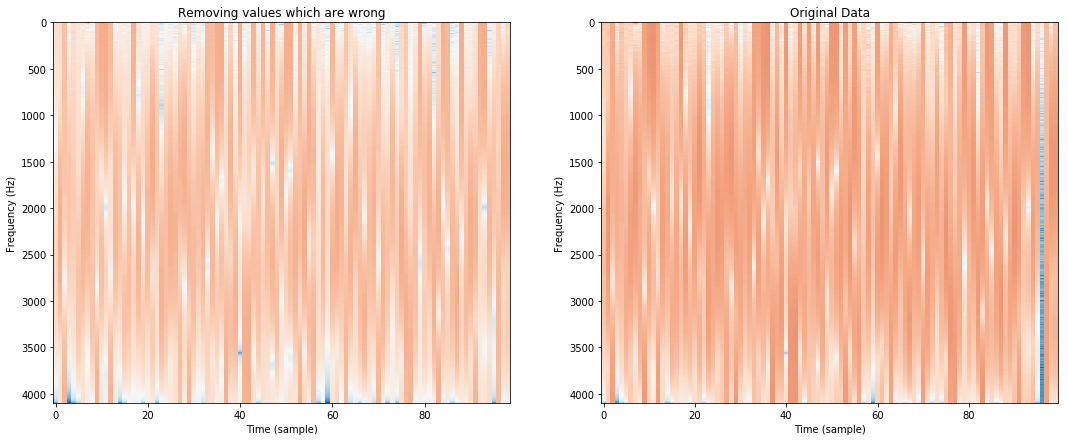

In [21]:
plt.figure(figsize = (18, 7))
plt.subplot(1, 2, 1)
plt.imshow(filtered.T, aspect = 'auto', cmap = 'RdBu_r')
plt.title('Removing values which are wrong')
plt.xlabel('Time (sample)')
plt.ylabel('Frequency (Hz)')

plt.subplot(1, 2, 2)
plt.imshow(S.T, aspect = 'auto', cmap = 'RdBu_r')
plt.title('Original Data')
plt.xlabel('Time (sample)')
plt.ylabel('Frequency (Hz)')

plt.show()